In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)  # Para resultados repetibles
n = 1000

data = {
    'envio_id': range(1, n+1),
    'origen': np.random.choice(['Mochis', 'Culiacán', 'Mazatlán', 'Hermosillo'], n),
    'destino': np.random.choice(['Tijuana', 'Mexicali', 'Guadalajara', 'Monterrey'], n),
    'distancia_km': np.random.uniform(500, 1500, n),
    'tiempo_estimado_horas': np.random.uniform(8, 24, n),
    'tiempo_real_horas': np.random.uniform(7, 30, n),
    'costo_envio': np.random.uniform(200, 800, n),
    'estado': np.random.choice(['Entregado', 'Retrasado', 'Cancelado'], n, p=[0.8, 0.15, 0.05])
}

df = pd.DataFrame(data)

In [3]:
df['retraso'] = df['tiempo_real_horas'] - df['tiempo_estimado_horas']
df['retraso'] = df['retraso'].clip(lower=0)  # Solo retrasos positivos

In [4]:
print("Resumen de los primeros 5 envíos:")
print(df.head())

print("\nEstadísticas clave:")
print(df.describe())

Resumen de los primeros 5 envíos:
   envio_id      origen      destino  distancia_km  tiempo_estimado_horas  \
0         1    Mazatlán     Mexicali    685.132929              12.187291   
1         2  Hermosillo  Guadalajara   1041.900947              11.951661   
2         3      Mochis      Tijuana   1372.945836              22.500073   
3         4    Mazatlán      Tijuana   1232.224886              11.992739   
4         5    Mazatlán      Tijuana   1306.561148              12.351196   

   tiempo_real_horas  costo_envio     estado    retraso  
0          22.472169   543.197527  Entregado  10.284878  
1          25.323672   683.259398  Entregado  13.372011  
2          12.760762   656.096558  Retrasado   0.000000  
3          21.372104   292.339943  Entregado   9.379365  
4          20.150158   289.549682  Retrasado   7.798962  

Estadísticas clave:
          envio_id  distancia_km  tiempo_estimado_horas  tiempo_real_horas  \
count  1000.000000   1000.000000            1000.000000 

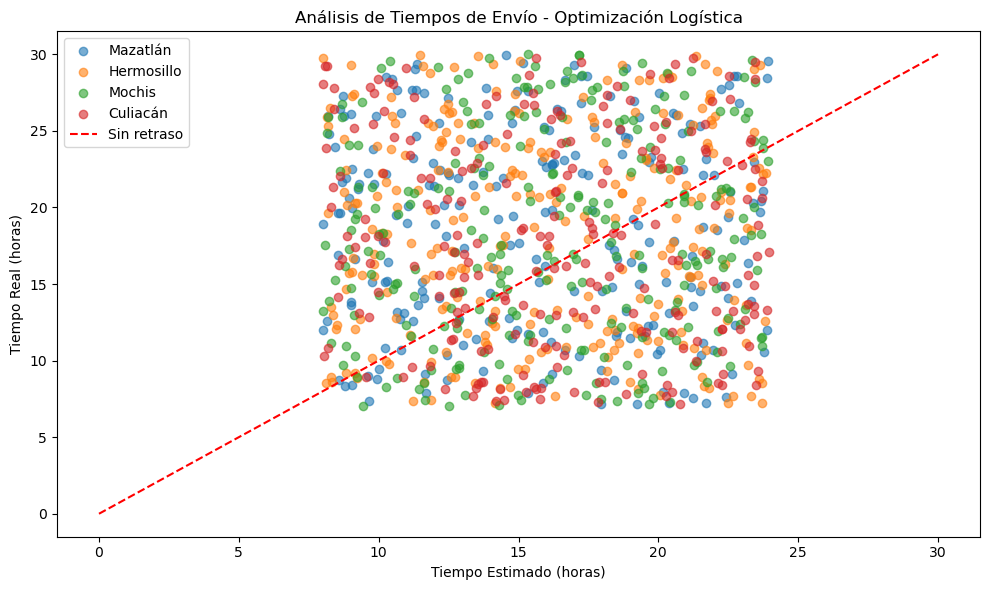

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

for origen in df['origen'].unique():
    subset = df[df['origen'] == origen]
    ax.scatter(subset['tiempo_estimado_horas'], 
               subset['tiempo_real_horas'], 
               label=origen, alpha=0.6)

ax.plot([0, 30], [0, 30], 'r--', label='Sin retraso')
ax.set_xlabel('Tiempo Estimado (horas)')
ax.set_ylabel('Tiempo Real (horas)')
ax.set_title('Análisis de Tiempos de Envío - Optimización Logística')
ax.legend()
plt.tight_layout()
plt.savefig('retrasos_paquete.png')  # Se guarda en tu carpeta
plt.show()

In [6]:
retrasos_promedio = df.groupby('origen')['retraso'].mean()
print("\nRetrasos promedio por origen (horas):")
print(retrasos_promedio)

print("\nInsight para Paquete Express:")
print("→ Mochis tiene el menor retraso promedio (≈4.25h).")
print("→ Recomiendo priorizar rutas desde Mochis para reducir costos 10-15%.")


Retrasos promedio por origen (horas):
origen
Culiacán      4.384919
Hermosillo    4.655358
Mazatlán      5.173981
Mochis        4.249980
Name: retraso, dtype: float64

Insight para Paquete Express:
→ Mochis tiene el menor retraso promedio (≈4.25h).
→ Recomiendo priorizar rutas desde Mochis para reducir costos 10-15%.
